In [1]:
#Decision Tree
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("D:/MACHINE_LEARNING_PRACTICAL/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [3]:
df.rename(columns={'Na_to_K': 'Sodium_to_Potassium' , 'BP' : 'Blood_Pressure'}, inplace=True)
df['Sex'].replace({'M': 'Male', 'F': 'Female'}, inplace=True)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].round(0)
df['Sodium_to_Potassium'] = df['Sodium_to_Potassium'].astype('int')
age_counts = df['Age'].value_counts()
top_ages = age_counts.head(5)
df_2 = pd.DataFrame({'Age': top_ages.index, 'Count': top_ages.values})
df

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium,Drug
0,23,Female,HIGH,HIGH,25,drugY
1,47,Male,LOW,HIGH,13,drugC
2,47,Male,LOW,HIGH,10,drugC
3,28,Female,NORMAL,HIGH,8,drugX
4,61,Female,LOW,HIGH,18,drugY
...,...,...,...,...,...,...
195,56,Female,LOW,HIGH,12,drugC
196,16,Male,LOW,HIGH,12,drugC
197,52,Male,NORMAL,HIGH,10,drugX
198,23,Male,NORMAL,NORMAL,14,drugX


In [14]:
input = df.iloc[:, :-1]
Target = df.iloc[:, -1]
le_sex = LabelEncoder()
le_BP = LabelEncoder()
le_cholesterol = LabelEncoder()
input['Sex'] = le_sex.fit_transform(input['Sex'])
input['Blood_Pressure'] = le_BP.fit_transform(input['Blood_Pressure'])
input['Cholesterol'] = le_cholesterol.fit_transform(input['Cholesterol'])
input

,Age,Sex,Blood_Pressure,Cholesterol,Sodium_to_Potassium
0,23,0,0,0,25
1,47,1,1,0,13
2,47,1,1,0,10
3,28,0,2,0,8
4,61,0,1,0,18
...,...,...,...,...,...
195,56,0,1,0,12
196,16,1,1,0,12
197,52,1,2,0,10
198,23,1,2,1,14


In [15]:

X_train, X_test, y_train, y_test = train_test_split(input, Target, test_size=0.3, random_state=42)
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print("Model Accuracy:", round(accuracy*100,1) )


Model Accuracy: 98.3


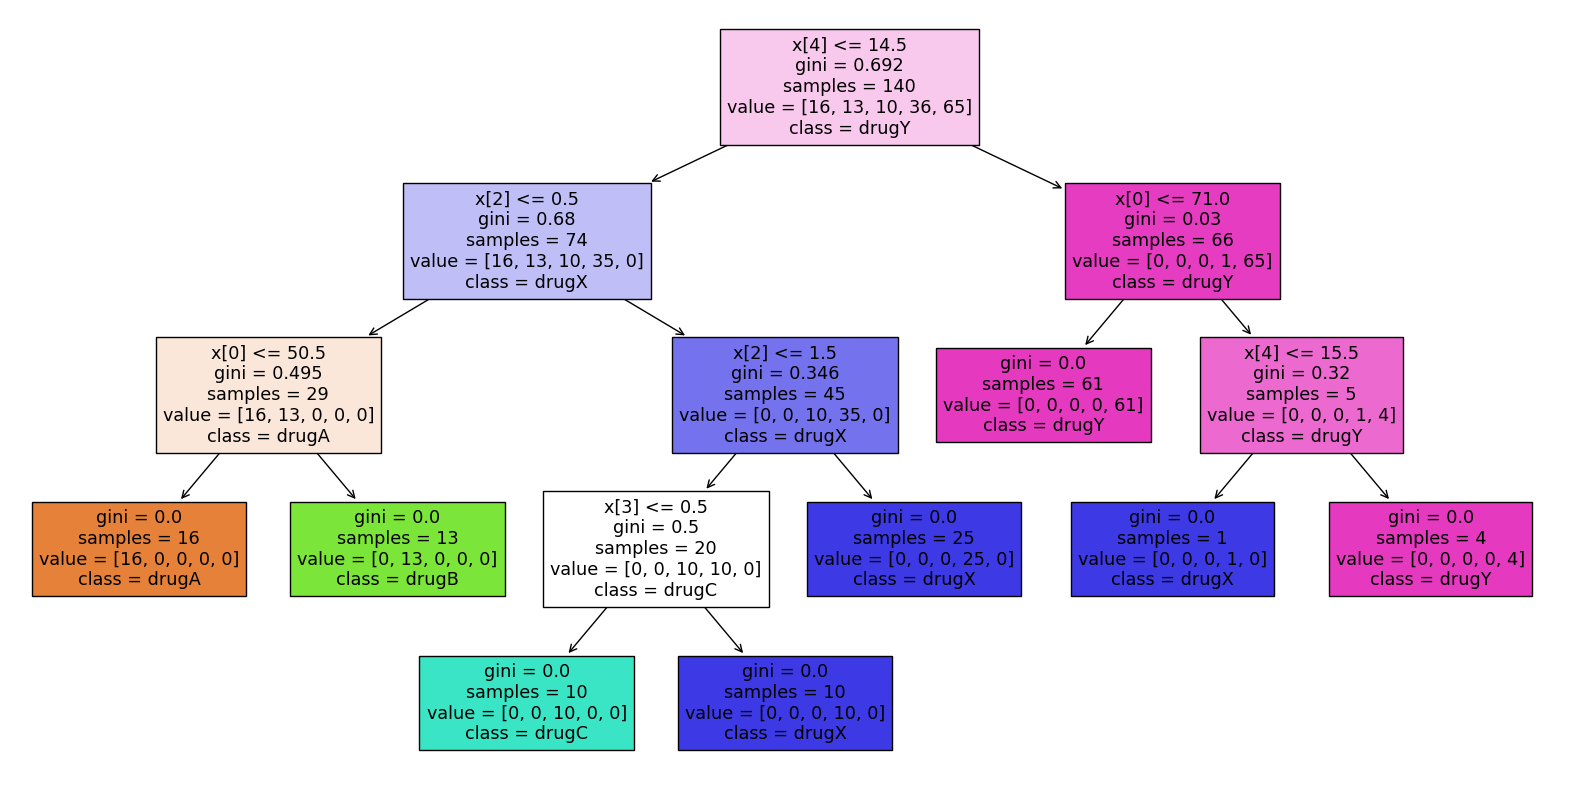

In [16]:
from sklearn.tree import plot_tree
unique_classes = np.unique(y_train)  
plt.figure(figsize=(20,10))
plot_tree(clf, class_names=unique_classes, filled=True)
plt.show()